In [10]:
import numpy as np
import matplotlib.pyplot as plt

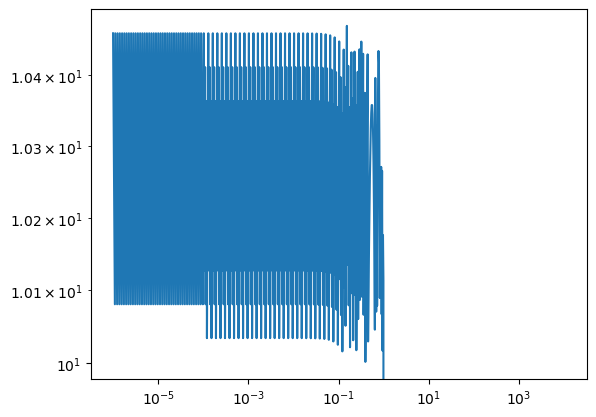

In [38]:

# temperature T (TeV), distance d (cm) --> flux (cm^2 s^-1)
flux = lambda d, T: 1.4 * 1e29 * T**(1.6) / (4 * 3.14159 * d**2)

# remaining lifetime (s)
tau = lambda T: 407 * (1.06 / T)**3

# effective time of exposure to energy band at temperature T
def effective_time(T, E_low, E_high):
    if T > E_high: # 
        return 1e-99
    elif T < E_low:
        return tau(E_low) - tau(E_high)
    else: # E_low < T < E_high
        return tau(T) - tau(E_high)

Aeff = .8 * 1e4 

GammaBkg = lambda E: 1.4 * 1e-6 * E**(-2.1)

avg_photon_energy = lambda T: 10 * T**.5

dOmega = 1e-3
E_low = .1 * 1e-3
E_high = 1

# Flux * Aeff * time >= 10
max_dist = []
for temp in np.logspace(-6, 4):


    tdg = np.array([ 
        Aeff * effective_time(temp, E_low, E_high) * flux(dist, temp) 
        for dist in np.logspace(10, 20)])

    tdg = tdg[ tdg >= 10]

    if len(tdg) == 0: 
        max_dist.append(0)
    else:
        max_dist.append(tdg[-1])
    
plt.loglog(np.logspace(-6, 4, 1_000), max_dist)